In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

netflix = pd.read_csv(
    filepath_or_buffer='data/netflix.csv',
    # parse_dates=['date_added'],
)
netflix["date_added"] = pd.to_datetime(
    netflix["date_added"].str.strip(),
    format="%d-%b-%y",
    errors='coerce'
)
netflix["type"] = netflix["type"].astype("category")
pd.DataFrame.info(netflix)
netflix.nunique()
# netflix.columns
netflix.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       5837 non-null   object        
 1   director    3936 non-null   object        
 2   date_added  5195 non-null   datetime64[ns]
 3   type        5837 non-null   category      
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 142.8+ KB


,title,director,date_added,type
5832,The Pursuit,John Papola,2019-08-07,Movie
5833,Hurricane Bianca,Matt Kugelman,2017-01-01,Movie
5834,Amar's Hands,Khaled Youssef,2019-04-26,Movie
5835,Bill Nye: Science Guy,Jason Sussberg,2018-04-25,Movie
5836,Age of Glory,NaN,NaT,TV Show


In [7]:
netflix.nunique()

title         5780
director      3024
date_added    1092
type             2
dtype: int64

<Axes: ylabel='count'>

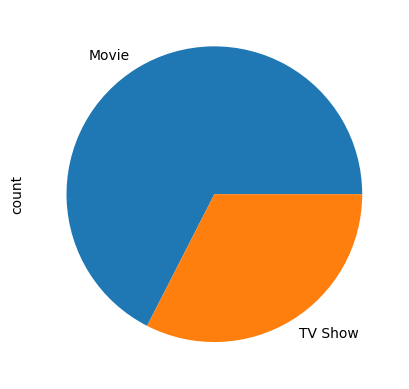

In [15]:
### соотношение сериалов и фильмов
netflix['type'].value_counts().plot(kind='pie')

In [9]:
directors = netflix.groupby("director")
result = directors["title"].agg(
    Total_Title='count',
).sort_values(by="Total_Title", ascending=False)
print(result)

                      Total_Title
director                         
Raúl Campos                    18
Jay Karas                      14
Marcus Raboy                   14
Jay Chapman                    12
Martin Scorsese                 8
...                           ...
John Papola                     1
John Patrick Shanley            1
John R. Leonetti                1
John Ridley                     1
Marco Bonfanti                  1

[3024 rows x 1 columns]


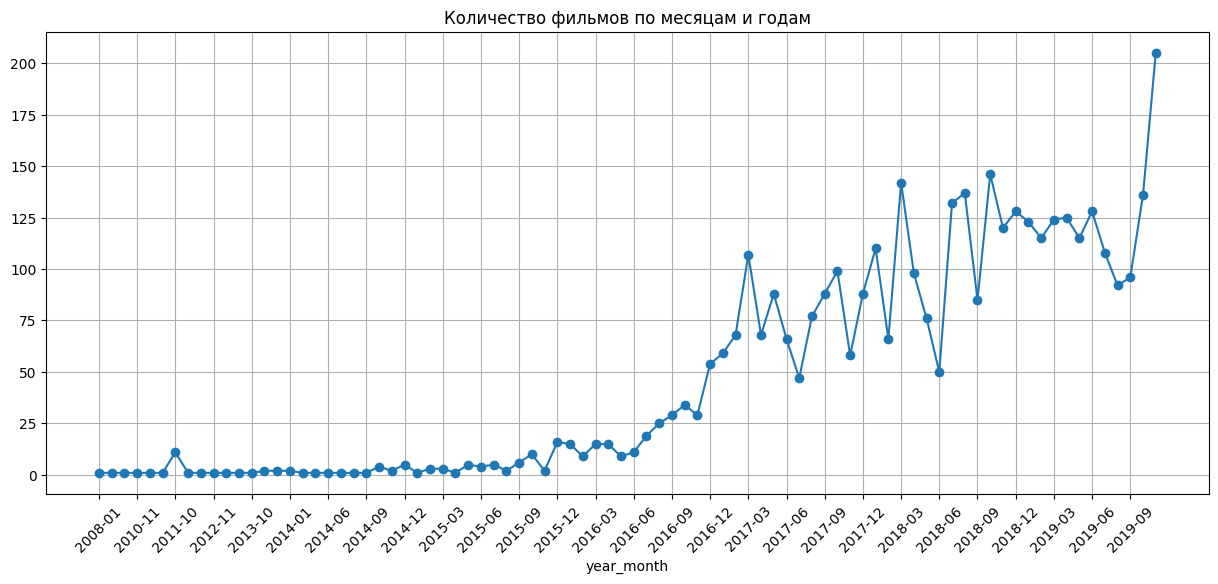

In [29]:
movies = netflix[(netflix['type'] == 'Movie') & (netflix['date_added'].notna())].copy()
movies['year_month'] = movies['date_added'].dt.to_period('M')
plot_data = movies.groupby('year_month')['title'].count()
plot_data.index = plot_data.index.astype(str)
ax = plot_data.plot(kind='line', figsize=(15, 6), marker='o')
plt.xticks(rotation=45) # Поворачиваем текст
plt.title('Количество фильмов по месяцам и годам')
plt.grid(True) # Добавим сетку для наглядности

# Показываем только каждую 3-ю метку, чтобы было читаемо
ticks = np.arange(0, len(plot_data), 3)
plt.xticks(ticks, plot_data.index[ticks], rotation=45)

plt.show()
